In [257]:
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
o1 = pd.read_csv('experimentation/observations_round_4_day_1.csv')
o2 = pd.read_csv('experimentation/observations_round_4_day_2.csv')
o3 = pd.read_csv('experimentation/observations_round_4_day_3.csv')

p1 = pd.read_csv('experimentation/prices_round_4_day_1.csv', sep=';')
p1 = [p1[p1['product'] == 'MAGNIFICENT_MACARONS']]
p2 = pd.read_csv('experimentation/prices_round_4_day_2.csv', sep=';')
p2 = [p2[p2['product'] == 'MAGNIFICENT_MACARONS']]
p3 = pd.read_csv('experimentation/prices_round_4_day_3.csv', sep=';')
p3 = [p3[p3['product'] == 'MAGNIFICENT_MACARONS']]


p1 = pd.concat(p1).set_index('timestamp')
p2 = pd.concat(p2).set_index('timestamp')
p3 = pd.concat(p3).set_index('timestamp')
o1 = o1.set_index('timestamp')
o2 = o2.set_index('timestamp')
o3 = o3.set_index('timestamp')


In [259]:
real_buy = lambda df: df.assign(real_buy=df['askPrice'] + df['transportFees'] + df['importTariff'])
real_sell = lambda df : df.assign(real_sell=df['bidPrice'] - df['transportFees'] - df['exportTariff'])
maxBid = lambda df: df.assign(max_bid=df[['bid_price_1', 'bid_price_2', 'bid_price_3']].max(axis=1, skipna=True))
minAsk = lambda df: df.assign(min_ask=df[['ask_price_1', 'ask_price_2', 'ask_price_3']].min(axis=1, skipna=True))

In [260]:
o1 = real_buy(o1)
o1 = real_sell(o1)
o2 = real_buy(o2)
o2 = real_sell(o2)
o3 = real_buy(o3)
o3 = real_sell(o3)




p1 = maxBid(p1)
p1 = minAsk(p1)
p2 = maxBid(p2)
p2 = minAsk(p2)
p3 = maxBid(p3)
p3 = minAsk(p3)


In [261]:
import matplotlib.pyplot as plt

def plot_dual_axis(df1, col1, df2, col2, title=None, color1='tab:blue', color2='tab:orange', xlim=None):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Filter by xlim if provided
    if xlim:
        df1_plot = df1[(df1.index >= xlim[0]) & (df1.index <= xlim[1])]
        df2_plot = df2[(df2.index >= xlim[0]) & (df2.index <= xlim[1])]
    else:
        df1_plot = df1
        df2_plot = df2

    ax1.plot(df1_plot.index, df1_plot[col1], color=color1, label=col1)
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel(col1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    if xlim:
        ax1.set_xlim(xlim)
        ax1.set_ylim(df1_plot[col1].min(), df1_plot[col1].max())

    ax2 = ax1.twinx()
    ax2.plot(df2_plot.index, df2_plot[col2], color=color2, label=col2)
    ax2.set_ylabel(col2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    if xlim:
        ax2.set_ylim(df2_plot[col2].min(), df2_plot[col2].max())

    plt.title(title or f"{col1} (left) vs {col2} (right) over time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_single_axis(df, col, title=None, color='tab:blue', xlim=None):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[col], color=color, label=col)
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.title(title or f"{col} over time")
    plt.grid(True)

    if xlim:
        plt.xlim(xlim)  # xlim should be a tuple like (start, end)

    plt.tight_layout()
    plt.show()



ValueError: Boolean array expected for the condition, not float64

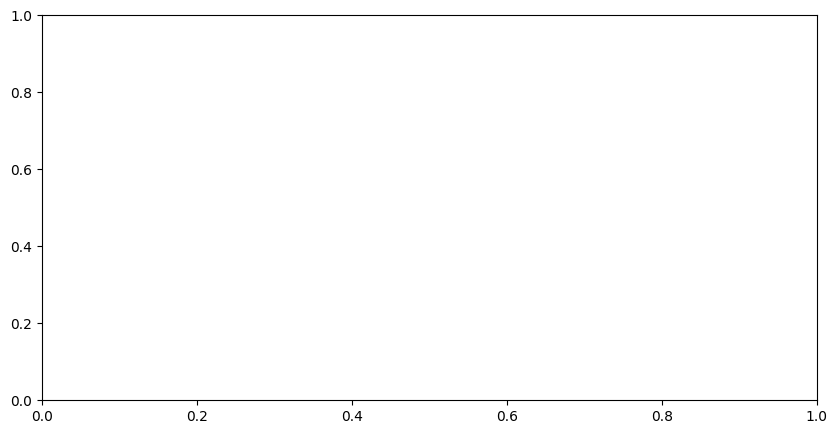

In [262]:
plot_dual_axis(o1, o1, 'sunlightIndex', 'real_buy')
plot_dual_axis(o2, p2, 'sunlightIndex', 'mid_price')
plot_dual_axis(o3, p3, 'sunlightIndex', 'mid_price')

In [263]:
add_sunlight_slope = lambda df: df.assign(
    sunlightIndex_slope=(df['sunlightIndex'] - df['sunlightIndex'].shift(200)) / 200
)


o1 = add_sunlight_slope(o1)
o2 = add_sunlight_slope(o2)
o3 = add_sunlight_slope(o3)

ValueError: Boolean array expected for the condition, not float64

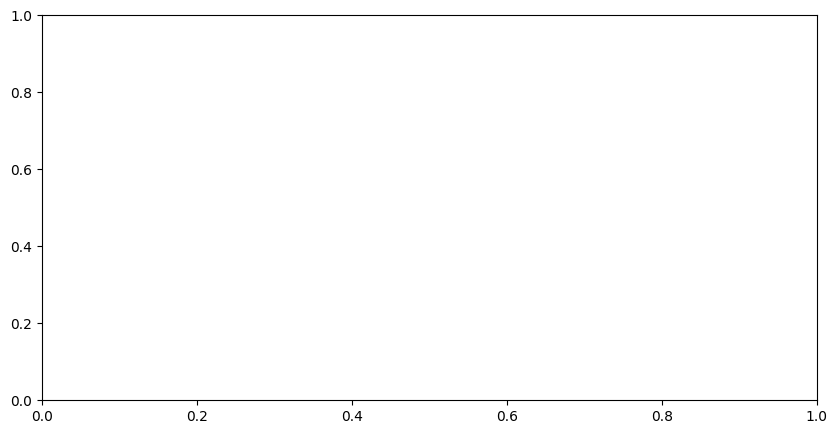

In [264]:
plot_dual_axis(o1, o1, 'sunlightIndex_slope', 'real_buy')
plot_dual_axis(o2, o2, 'sunlightIndex_slope', 'real_buy')
plot_dual_axis(o3, o3, 'sunlightIndex_slope', 'real_buy')

In [265]:
o1.loc[200000]


bidPrice               615.00000
askPrice               617.00000
transportFees            1.00000
exportTariff             9.00000
importTariff            -3.00000
sugarPrice             197.13555
sunlightIndex           65.00000
real_buy               615.00000
real_sell              605.00000
sunlightIndex_slope      0.00250
Name: 200000, dtype: float64

In [266]:
o2.loc[200000]


bidPrice               560.000000
askPrice               561.500000
transportFees            1.800000
exportTariff             9.500000
importTariff            -3.500000
sugarPrice             202.693945
sunlightIndex           67.500000
real_buy               559.800000
real_sell              548.700000
sunlightIndex_slope      0.001250
Name: 200000, dtype: float64

In [252]:
o3.loc[200300]

bidPrice               602.000000
askPrice               603.500000
transportFees            2.000000
exportTariff            10.500000
importTariff            -3.500000
sugarPrice             194.625188
sunlightIndex           65.020000
real_buy               602.000000
real_sell              589.500000
sunlightIndex_slope      0.005000
Name: 200300, dtype: float64

In [253]:
p1.loc[200000]

day                                   1
product            MAGNIFICENT_MACARONS
bid_price_1                       612.0
bid_volume_1                       16.0
bid_price_2                       610.0
bid_volume_2                       19.0
bid_price_3                       605.0
bid_volume_3                       30.0
ask_price_1                         620
ask_volume_1                          8
ask_price_2                       628.0
ask_volume_2                       30.0
ask_price_3                       633.0
ask_volume_3                       19.0
mid_price                         616.0
profit_and_loss                     0.0
max_bid                           612.0
min_ask                           620.0
Name: 200000, dtype: object

# 

In [254]:
# Define entry and exit timestamps
entry_time = 200_000
exit_time = entry_time + 200_000

# Check if both timestamps exist
if entry_time in o2.index and exit_time in p2.index:
    entry_conditions = (
        o2.loc[entry_time, "sunlightIndex"] < 70
        and o2.loc[entry_time, "sunlightIndex_slope"] < 0.0045
    )

    if entry_conditions:
        buy_price = p2.loc[entry_time, "min_ask"]
        sell_price = p2.loc[exit_time, "max_bid"]
        pnl = 75 * (sell_price - buy_price)

        print(f"Buy at {entry_time} for {buy_price}")
        print(f"Sell at {exit_time} for {sell_price}")
        print(f"PnL: {pnl:.2f}")
    else:
        print("Conditions not met at timestamp 200000.")
else:
    print("Required timestamps not available in the data.")


Buy at 200000 for 565.0
Sell at 400000 for 642.0
PnL: 5775.00


In [255]:
best_buy_time = None
best_sell_time = None
min_ask_so_far = float('inf')
min_ask_time = None
max_profit = float('-inf')

for t in p1.index:
    ask = p1.loc[t, "min_ask"]
    bid = p1.loc[t, "max_bid"]

    # Update the best buy point
    if ask < min_ask_so_far:
        min_ask_so_far = ask
        min_ask_time = t

    # Calculate profit if we sold now, based on earlier best buy
    profit = 75 * (bid - min_ask_so_far)
    if profit > max_profit:
        max_profit = profit
        best_buy_time = min_ask_time
        best_sell_time = t

print(f"Best Buy Time: {best_buy_time}, Price: {p1.loc[best_buy_time, 'min_ask']}")
print(f"Best Sell Time: {best_sell_time}, Price: {p1.loc[best_sell_time, 'max_bid']}")
print(f"Max PnL: {max_profit:.2f}")


Best Buy Time: 44900, Price: 572.0
Best Sell Time: 343800, Price: 852.0
Max PnL: 21000.00


In [256]:
merged = pd.merge(o1, p1, left_index=True, right_index=True)

pnl = 0
trade_log = []

for t, row in merged.iterrows():
    buy_price = row["real_buy"]
    sell_price = row["max_bid"]

    if buy_price < sell_price:
        pnl += 75 * (sell_price - buy_price)
        trade_log.append({
            "timestamp": t,
            "buy_price": buy_price,
            "sell_price": sell_price,
            "pnl": 75 * (sell_price - buy_price)
        })

trade_df = pd.DataFrame(trade_log)

print(f"Total PnL: {pnl:.2f}")
trade_df.head()


Total PnL: 31627.50


,timestamp,buy_price,sell_price,pnl
0,2000,643.5,644.0,37.5
1,10000,627.0,628.0,75.0
2,18600,615.0,616.0,75.0
3,22500,613.0,615.0,150.0
4,28200,601.0,602.0,75.0


In [222]:
merged = pd.merge(o1, p1, left_index=True, right_index=True)

pnl = 0
trade_log = []

for t, row in merged.iterrows():
    buy_price = row["min_ask"] - 1
    sell_price = row["real_sell"]

    if buy_price < sell_price:
        pnl += 75 * (sell_price - buy_price)
        trade_log.append({
            "timestamp": t,
            "buy_price": buy_price,
            "sell_price": sell_price,
            "pnl": 75 * (sell_price - buy_price)
        })

trade_df = pd.DataFrame(trade_log)

print(f"Total PnL: {pnl:.2f}")
trade_df


Total PnL: 0.00


""


In [223]:
# PARAMETERS
offset = 200_000  # holding period
results = []

for t0 in p1.index:
    t1 = t0 + offset
    if t1 not in o1.index or t1 not in p1.index:
        continue

    # Leg A: initial short at local max_bid
    entry_bid   = p1.loc[t0, "max_bid"] + 1

    # Import purchase at t1
    import_cost = o1.loc[t1, "real_buy"]

    # Leg B: re‑short (sell) at local (max_bid + 1)
    arb_bid     = p1.loc[t1, "max_bid"] + 1

    # Compute PnL for both legs
    pnlA = entry_bid   - import_cost
    pnlB = arb_bid     - import_cost
    total = pnlA + pnlB

    results.append({
        "t0":      t0,
        "t1":      t1,
        "entry_bid":   entry_bid,
        "import_cost": import_cost,
        "arb_bid":     arb_bid,
        "pnlA":    pnlA,
        "pnlB":    pnlB,
        "total":   total
    })

# Summarize
df_trips = pd.DataFrame(results)
print("Net PnL over all round-trips:", df_trips["total"].sum())
df_trips


Net PnL over all round-trips: -131111.60000000003


,t0,t1,entry_bid,import_cost,arb_bid,pnlA,pnlB,total
0,0,200000,625.0,615.0,613.0,10.0,-2.0,8.0
1,100,200100,628.0,612.0,611.0,16.0,-1.0,15.0
2,200,200200,628.0,615.5,614.0,12.5,-1.5,11.0
3,300,200300,630.0,619.0,618.0,11.0,-1.0,10.0
4,400,200400,629.0,618.0,617.0,11.0,-1.0,10.0
...,...,...,...,...,...,...,...,...
7995,799500,999500,608.0,659.9,658.0,-51.9,-1.9,-53.8
7996,799600,999600,608.0,658.4,657.0,-50.4,-1.4,-51.8
7997,799700,999700,609.0,657.4,656.0,-48.4,-1.4,-49.8
7998,799800,999800,605.0,656.9,655.0,-51.9,-1.9,-53.8


    offset   net_pnl
0    10000  -29848.6
1    20000  -37360.6
2    30000  -45363.6
3    40000  -54689.6
4    50000  -64791.6
5    60000  -75723.6
6    70000  -86286.6
7    80000  -95899.6
8    90000  -99600.6
9   100000 -104393.6
10  110000 -107808.6
11  120000 -112494.6
12  130000 -116789.6
13  140000 -119114.6
14  150000 -121593.6
15  160000 -124092.6
16  170000 -124257.6
17  180000 -127931.6
18  190000 -131818.6
19  200000 -131111.6


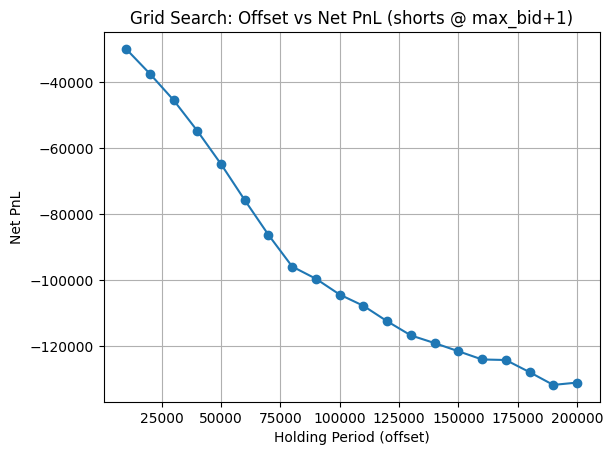

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Define offsets from 10k to 200k in 10k steps
offsets = list(range(10_000, 210_000, 10_000))
results = []

# 2) Make sure real_buy is on o1:
#    o1["real_buy"] = o1["askPrice"] + o1["transportFees"] + o1["importTariff"]

for offset in offsets:
    total_pnl = 0.0

    # t0 candidates where t1 exists in both p1 and o1
    valid_t0 = [t for t in p1.index 
                if (t + offset) in p1.index 
                and (t + offset) in o1.index]

    for t0 in valid_t0:
        t1 = t0 + offset

        # Leg A: short at t0 at max_bid + 1
        entry_bid   = p1.loc[t0, "max_bid"] + 1

        # Import buy at t1
        import_cost = o1.loc[t1, "real_buy"]

        # Leg B: re-short at t1 at max_bid + 1
        arb_bid     = p1.loc[t1, "max_bid"] + 1

        pnlA = entry_bid - import_cost
        pnlB = arb_bid   - import_cost
        total_pnl += (pnlA + pnlB)

    results.append({
        "offset": offset,
        "net_pnl": total_pnl
    })

# 3) Convert to DataFrame and plot
df_scan = pd.DataFrame(results)
print(df_scan)

plt.plot(df_scan["offset"], df_scan["net_pnl"], marker="o")
plt.xlabel("Holding Period (offset)")
plt.ylabel("Net PnL")
plt.title("Grid Search: Offset vs Net PnL (shorts @ max_bid+1)")
plt.grid(True)
plt.show()


In [225]:
# Ensure both DataFrames have the same index structure (timestamps aligned)
df_spread = pd.DataFrame(index=p1.index)

# Compute the spread
df_spread["spread"] = (p1["max_bid"] + 1) - o1["real_buy"]


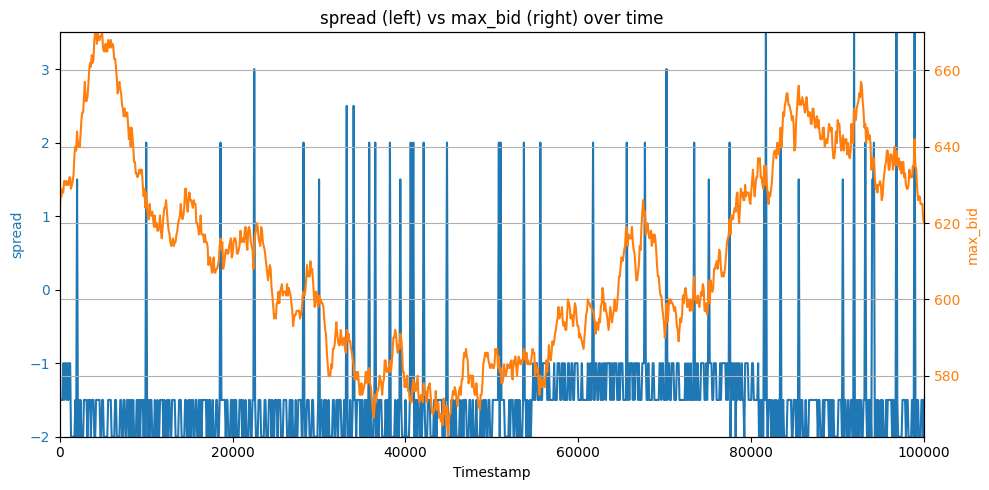

In [226]:
#plot_single_axis(df_spread, "spread", xlim=(200_000, 201_000))
#plot_single_axis(df_spread, "spread")

plot_dual_axis(df_spread, 'spread', p1,'max_bid', xlim=(0, 100_000))


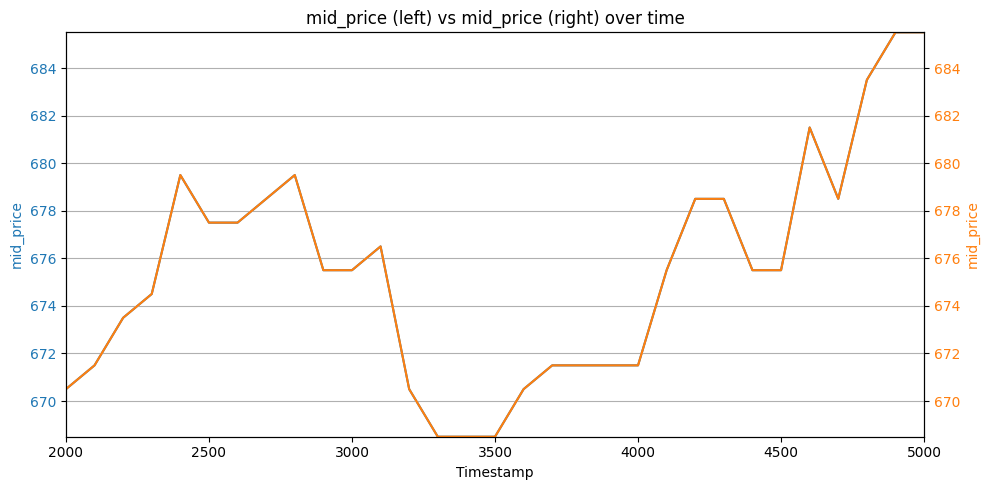

In [237]:
o1['sugarPrice'] = 3 * o1['sugarPrice']
plot_dual_axis(p2, 'mid_price', p2,'mid_price', xlim=(2_000, 5_000))